# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-27 12:00:05.807804


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/26/20


,10/26/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,8702750,225706,2.59
Brazil,5409854,157397,2.91
India,7946429,119502,1.50
Mexico,895326,89171,9.96
United Kingdom,897740,45088,5.02
Italy,542789,37479,6.90
France,1209651,35052,2.90


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/26/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
48543,US,8575177,2020-10-24,224889.0,914.0,83718.0,66970.428571
48542,US,8491459,2020-10-23,223975.0,943.0,83757.0,63227.714286
48541,US,8407702,2020-10-22,223032.0,856.0,71671.0,61141.857143
48540,US,8336031,2020-10-21,222176.0,1124.0,62735.0,59990.285714
48539,US,8273296,2020-10-20,221052.0,933.0,60315.0,59527.285714
48538,US,8212981,2020-10-19,220119.0,445.0,58387.0,58397.428571
48537,US,8154594,2020-10-18,219674.0,388.0,48210.0,56006.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/26/20


,10/26/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,496655,33424.0,6.73
Texas,898302,17978.0,2.00
California,910438,17386.0,1.91
Florida,782013,16449.0,2.10
New Jersey,229684,16292.0,7.09
Massachusetts,151777,9881.0,6.51
Illinois,383687,9792.0,2.55


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/26/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1671,California,903684,2020-10-24,17343.0,38.0,4885.0,4295.714286
1670,California,898799,2020-10-23,17305.0,49.0,5435.0,3935.142857
1669,California,893364,2020-10-22,17256.0,89.0,6425.0,3602.285714
1668,California,886939,2020-10-21,17167.0,112.0,3193.0,3105.000000
1667,California,883746,2020-10-20,17055.0,73.0,4101.0,3205.142857
1666,California,879645,2020-10-19,16982.0,3.0,3953.0,3104.571429
1665,California,875692,2020-10-18,16979.0,23.0,2078.0,2928.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/26/20


,10/26/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,300614,7000.0,2.33
Orange,58725,1447.0,2.46
Riverside,66732,1295.0,1.94
San Bernardino,62774,1072.0,1.71
San Diego,54941,870.0,1.58
San Joaquin,21630,489.0,2.26
Sacramento,25445,484.0,1.90


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/26/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5298,Los Angeles,298937,2020-10-24,6989.0,15.0,2116.0,1543.000000
5297,Los Angeles,296821,2020-10-23,6974.0,18.0,2756.0,1371.285714
5296,Los Angeles,294065,2020-10-22,6956.0,12.0,3579.0,1126.000000
5295,Los Angeles,290486,2020-10-21,6944.0,32.0,477.0,781.428571
5294,Los Angeles,290009,2020-10-20,6912.0,35.0,643.0,894.142857
5293,Los Angeles,289366,2020-10-19,6877.0,1.0,915.0,912.000000
5292,Los Angeles,288451,2020-10-18,6876.0,13.0,315.0,902.285714
5291,Los Angeles,288136,2020-10-17,6863.0,8.0,914.0,995.857143
5290,Los Angeles,287222,2020-10-16,6855.0,21.0,1039.0,1044.714286
5289,Los Angeles,286183,2020-10-15,6834.0,22.0,1167.0,1074.000000



7 day new US cases as of 10/26/20


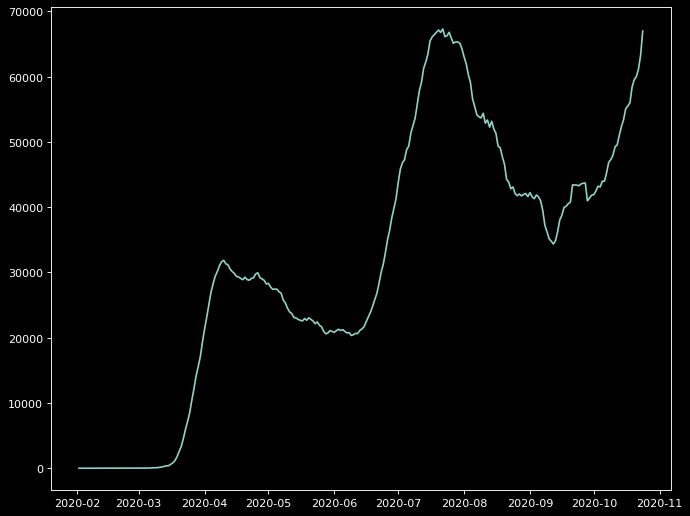

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/26/20


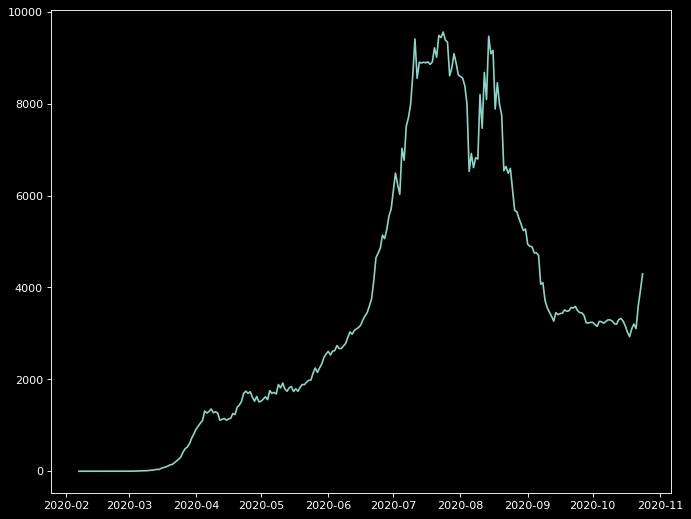

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/26/20


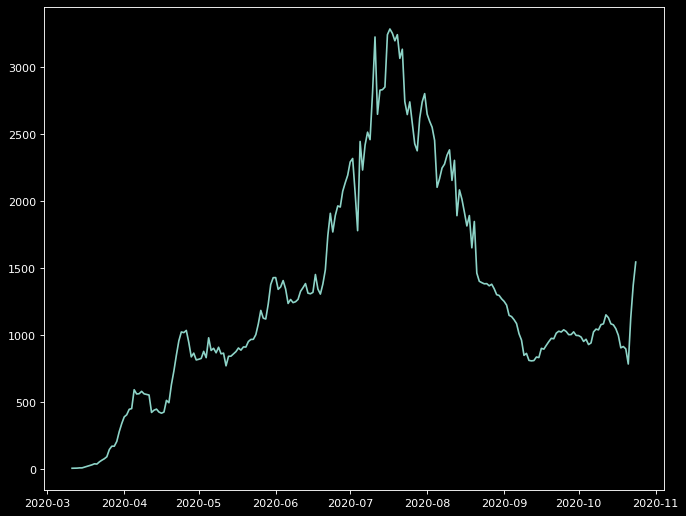

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()